# Image Segmentation using GMM (Gaussian Mixture Model)



If image regions are eailty separable i.e., the histogram have separable peaks from where we can pick thresholding values easily we can use k-means clustering for image segmentation as the scatter plot of pixel will be easily grouped.

But what if the regions are not easily separable. The peaks in the histogram are not distinct or clear. (The histogram will look like merging of different peaks very deeply) We cannot easily and surely spot the thresholding values out of it. In terms of k-means we can say that the clusters are not easily separable or they are highly overlapped.

In such a case we use GMM i.e., Gaussian Mixture Model. GMM assumes that there are many gaussians (normal curves) in the histogram. In other way we can say that the Image Histogram is made up of many small gaussian histograms.

[IMAGE]

Curve in the Blue is combination of 4 Red curves mixed at different proportions. Where each of these small gaussians have their own mean and s.d.(spread) and also the height (which is treated as weights given to the gaussian)

[IMAGE]

- Each data points will have some probability related to each kind of region (small gaussians)

- just like k-means, the centre is now updated using weighted AM where prob. are considered as weights and the process is repeated in next iteration.

Both BIC and AIC are included as built in methods as part of Scikit-Learn's  GaussianMixture. Therefore we do not need to import any other libraries to compute these. The way you compute them (for example BIC) is by fitting a GMM model and then calling the method BIC. In the video I tried to achieve multiple things in one single line, compute BIC for each GMM calculated by changing number of components and also to plot them. Let me elaborate...

Instead of changing number of components in a loop let us compute one at a time, for example let us define n = 2. Then fit a gmm model for n=2 and then calculate BIC. The code would look like ...

In [1]:
import numpy as np
import cv2

img = cv2.imread("images/Alloy.jpg")
img2 = img.reshape((-1,3))

In [2]:
from sklearn.mixture import GaussianMixture as GMM

n = 2
gmm_model = GMM(n, covariance_type='tied').fit(img2)
#The above line generates GMM model for n=2

gmm_labels  = gmm_model.predict(img2) #generate labels for segments

`covariance_type` have four options: full (default), tied, spherical and diagonal.

To visulaize the labels, lets put back the numbers in the shape of orginal image i.e., we will be reconstructed the original image with labels.

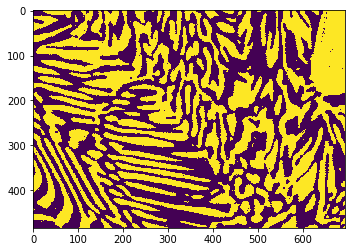

In [4]:
original_shape = img.shape #create a variable with original image shape

segmented = gmm_labels.reshape(original_shape[0], original_shape[1])  # .reshape(1125,1500)
# we dont have a 3rd channel in our segmented image

import matplotlib.pyplot as plt
plt.imshow(segmented)

Now let us call the bic method (or aic if you want).

In [ ]:
bic_value = gmm_model.bic(img2)  #Remember to call the same model name from above)
print(bic_value)  #You should see bic for GMM model generated using n=2.
#Do this exercise for different n values and plot them to find the minimum.

Now, to explain `m.bic`, here are the lines I used in the video. 

In [ ]:
n_components = np.arange(1,10)
gmm_models = [GMM(n, covariance_type='tied').fit(img2) for n in n_components]
plt.plot(n_components, [m.bic(img2) for m in gmm_models], label='BIC')

Here, we are computing multiple GMM models each by changing n value from 1 to 10. 
Then, for each n value we are computing bic via `m.bic(img2)` where m is replaced by gmm_models for each of the model generated. Think of this as typing `gmm_model.bic(img2)` each time you change n and generate a new GMM model. 

I hope this explanation helps better understand the video content. 

---

In [ ]:
import numpy as np
import cv2


#Use plant cells to demo the GMM on 2 components
#Use BSE_Image to demo it on 4 components
#USe alloy.jpg to demonstrate bic and how 2 is optimal for alloy

img = cv2.imread("images/BSE_Image.jpg")

# Convert MxNx3 image into Kx3 where K=MxN
img2 = img.reshape((-1,3))  #-1 reshape means, in this case MxN

from sklearn.mixture import GaussianMixture as GMM

#covariance choices, full, tied, diag, spherical
gmm_model = GMM(n_components=4, covariance_type='tied').fit(img2)  #tied works better than full
gmm_labels = gmm_model.predict(img2)

#Put numbers back to original shape so we can reconstruct segmented image
original_shape = img.shape
segmented = gmm_labels.reshape(original_shape[0], original_shape[1])
cv2.imwrite("images/segmented.jpg", segmented)